# Project to compare a section of Mars Geospatial Data 
## Thermal Inertia maps: THEMIS, MELLON & EMM+KRC

**Themis**: The Thermal Emission Imaging System (THEMIS) is an instrument on board the Mars Odyssey spacecraft. It combines a 5-wavelength visual imaging system with a 9-wavelength infrared imaging system.

Mars Odyssey launched from Kennedy Space Center on April 7, 2001 and arrived at Mars on October 24, 2001. It spent the next several months achieving a circular mapping orbit by aerobraking (dipping into the atmosphere to slow and shrink the orbit). Aerobraking concluded in early February 2002, and primary mapping operations began a few weeks later.
https://themis.asu.edu/about

**Mellon**: High-resolution thermal inertia mapping results are presented, derived from Mars Global Surveyor (MGS) Thermal Emission Spectrometer (TES) observations of the surface temperature of Mars obtained during the early portion of the MGS mapping mission

https://www.sciencedirect.com/science/article/pii/S0019103500965035

**EMM**: Hope mission to MARS
https://sdc.emiratesmarsmission.ae/

**KRC**: KRC is a computer program designed to compute surface and subsurface temperatures for planets and satellites with or without modest atmospheres. A single KRC run can handle complex subsurface physical properties for a global set of latitudes at a full set of seasons, with enough depth to capture the annual thermal wave, and to compute seasonal atmosphere condensation mass. Initially developed for Mars at the dawn of space exploration, there are generalities that allow this code set to be used for any solid body with any spin vector, in any orbit (around any star), with or without an atmosphere. The code is largely in FORTRAN and has evolved over 50 years and has been used extensively by the planetary science community.

KRC was developed by Hugh Kieffer with NASA funding. The web-site is maintained by Arizona State University, The interactive interface is supported by a Caltech, JPL, Northern Arizona University consortium.

https://krc.mars.asu.edu/index.php?title=Main_Page 

In [1]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# EMM Grid saved as npy
p_emm_krc = '/scratch/pk97/krc/krc_codes/Data/TI_KRC_Output/ti2/numpy_map_krc_ti/run1/'
f_emm_krc =  'N30_S0_WN30_E0_TI_from_Krc_ls_90_non_averaged_input_run1.npy'
emm_krc_npy = np.load(p_emm_krc+f_emm_krc)
emm_krc_npy.shape

(180, 360)

Text(0.5, 1.0, 'EMM KRC - Thermal Inertia Plot')

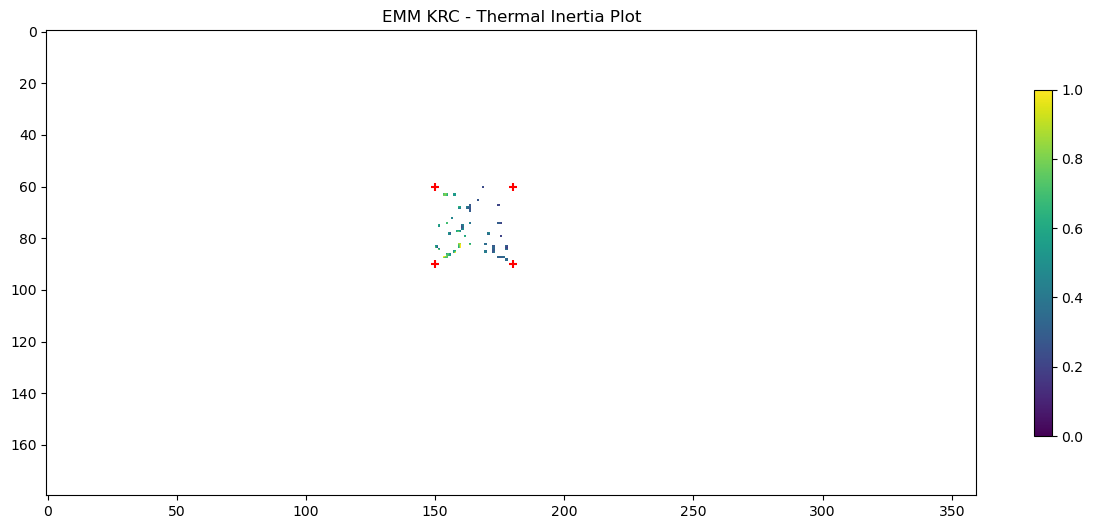

In [3]:
# How does it look?
# # Where is it placed geospatially

plt.figure(figsize=(15,15))
plt.imshow(emm_krc_npy, vmin=0, vmax=800)
plt.scatter(x=150, y = 90, marker='+', color = 'red')
plt.scatter(x=180, y = 90, marker='+', color = 'red')
plt.scatter(x=150, y = 60, marker='+', color = 'red')
plt.scatter(x=180, y = 60, marker='+', color = 'red')
plt.colorbar(shrink=.3)
plt.title('EMM KRC - Thermal Inertia Plot')

In [6]:
# Mellon Thermal Inertia map nighttime
# Read Mellon Map

path = '/scratch/pk97/krc/krc_codes/Data/'
filename_mellon = 'Mellon_Night_Time_TI_map_180_360.npy'
mellon_npy = np.load(path+filename_mellon)
mellon_npy.shape

(180, 360)

Text(0.5, 1.0, 'Mellon Night Time Thermal Inertia Plot')

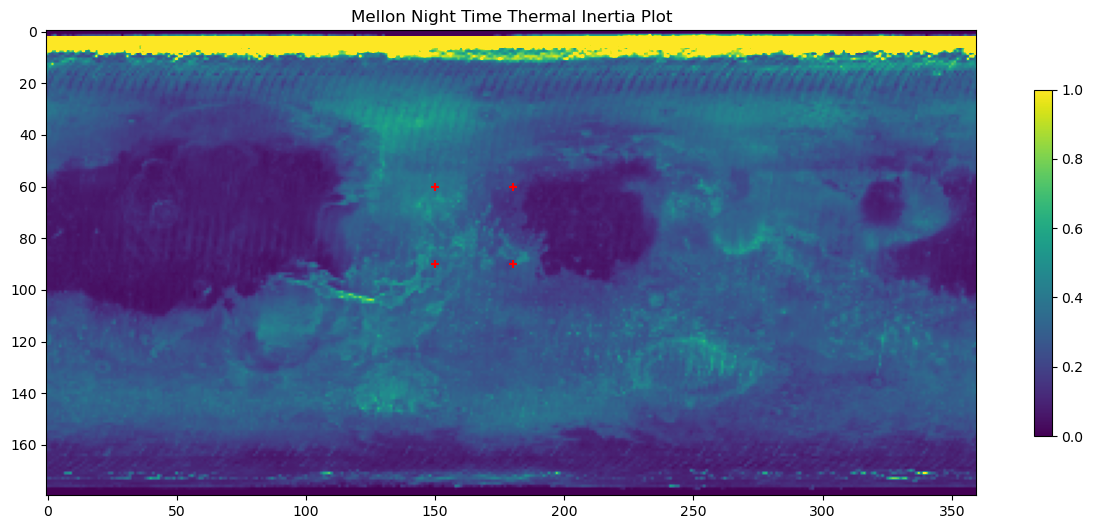

In [5]:
# How does it look?
# # Where is it placed geospatially

plt.figure(figsize=(15,15))
plt.imshow(mellon_npy, vmin=0, vmax=800)
plt.scatter(x=150, y = 90, marker='+', color = 'red')
plt.scatter(x=180, y = 90, marker='+', color = 'red')
plt.scatter(x=150, y = 60, marker='+', color = 'red')
plt.scatter(x=180, y = 60, marker='+', color = 'red')
plt.colorbar(shrink=.3)
plt.title('Mellon Night Time Thermal Inertia Plot')

In [11]:
# Themis

p_themis = '/scratch/pk97/krc/krc_codes/Data/Themis_npy/'
#f_themis = 'Themis_npy_N30_S0_W60_E0.npy'
f_themis = 'Themis_npy_N30_E120.npy'
themis_npy = np.load(p_themis+f_themis)
themis_npy.shape

(180, 360)

Text(0.5, 1.0, 'Themis Night Time Thermal Inertia Plot')

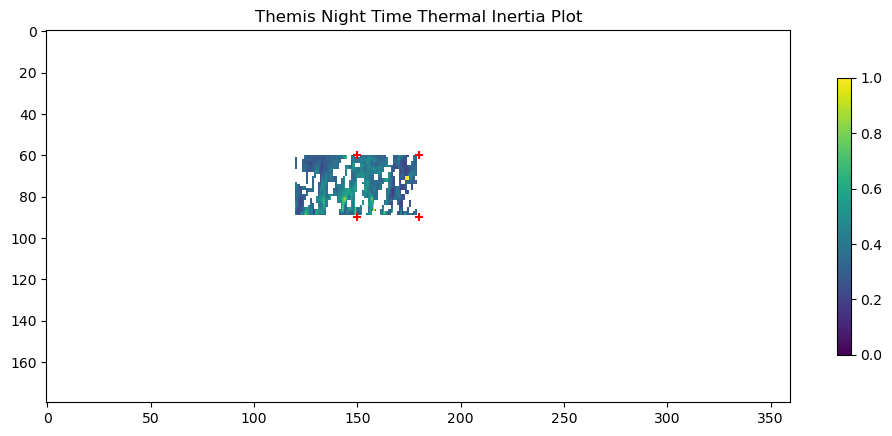

In [13]:
# How does it look?
# # Where is it placed geospatially

plt.figure(figsize=(12, 12)) 
plt.imshow(themis_npy, vmin=0, vmax=800)
plt.scatter(x=150, y = 90, marker='+', color = 'red')
plt.scatter(x=180, y = 90, marker='+', color = 'red')
plt.scatter(x=150, y = 60, marker='+', color = 'red')
plt.scatter(x=180, y = 60, marker='+', color = 'red')
plt.colorbar(shrink=.3)
plt.title('Themis Night Time Thermal Inertia Plot')

In [14]:
# Get grids
themis_grid = themis_npy[60:90, 150:180]
mellon_grid = mellon_npy[60:90, 150:180]
emm_grid = emm_krc_npy[60:90, 150:180]

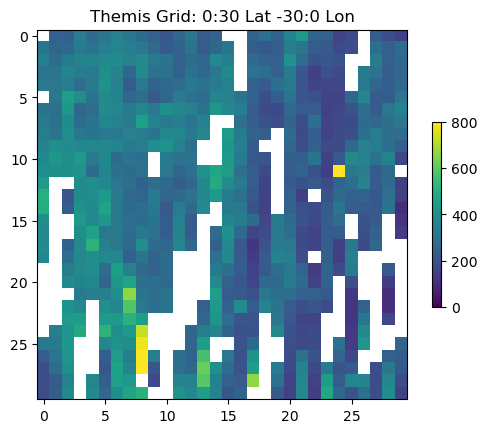

In [15]:
# View themis grid
plt.imshow(themis_grid, vmin=0, vmax=800)
plt.colorbar(shrink=0.5)
plt.title('Themis Grid: 0:30 Lat -30:0 Lon')
plt.show()

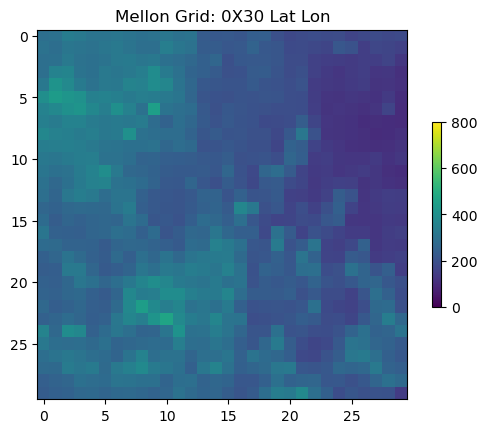

In [16]:
# View mellon grid
plt.imshow(mellon_grid, vmin=0, vmax=800)
plt.colorbar(shrink=0.5)
plt.title('Mellon Grid: 0X30 Lat Lon')
plt.show()

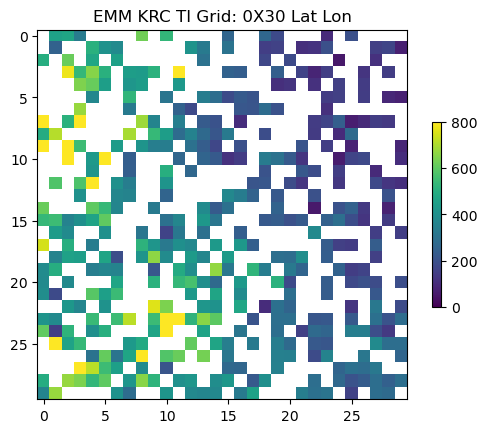

In [17]:
# View emm grid
plt.imshow(emm_grid, vmin=0, vmax=800)
plt.colorbar(shrink=0.5)
plt.title('EMM KRC TI Grid: 0X30 Lat Lon')
plt.show()

In [18]:
def get_pct_difference(arr1, arr2):
    '''Pct Difference between 2 arrays of same shape for non zero elements
    Grid Size is 30X30'''
    
    array_new = np.empty((30,30))
    array_new.fill(np.nan)
    
    for i in range(0,30):
        for j in range(0,30):
            if np.isfinite(arr1[i][j]) & np.isfinite(arr2[i][j]): #check validity
                diff = np.absolute(arr1[i][j] - arr2[i][j])
                array_new[i][j] = (diff/arr1[i][j])*100
            else:
                array_new[i][j] = np.nan 
    return array_new
    

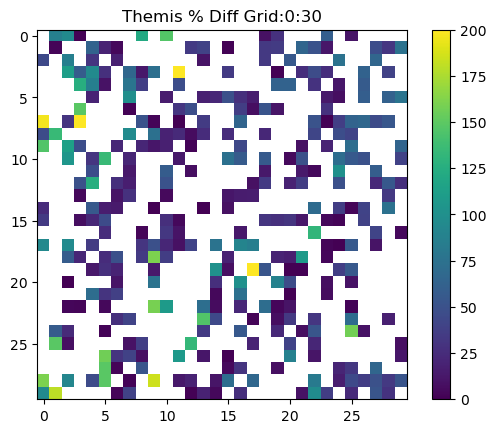

In [19]:
# View pct difference

plt.imshow(get_pct_difference(themis_grid, emm_grid))
plt.title('Themis % Diff Grid:0:30')
plt.colorbar()
plt.clim(0, 200)

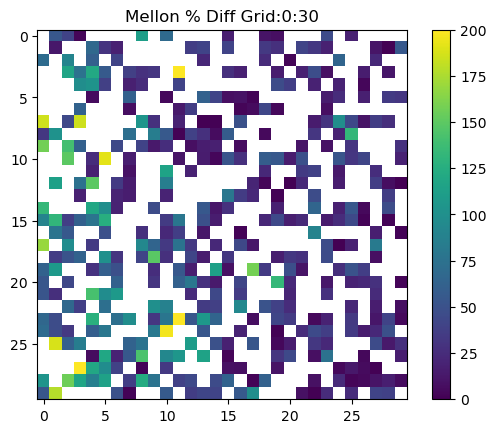

In [20]:
plt.imshow(get_pct_difference(mellon_grid, emm_grid))
plt.title('Mellon % Diff Grid:0:30')
plt.colorbar()
plt.clim(0, 200)

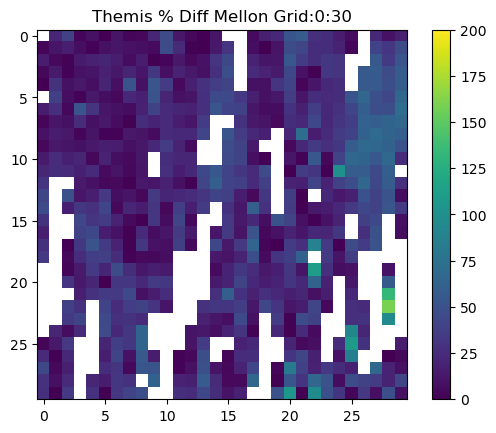

In [21]:
plt.imshow(get_pct_difference(themis_grid, mellon_grid), vmin=0, vmax=120)
plt.title('Themis % Diff Mellon Grid:0:30')
plt.colorbar()
plt.clim(0, 200)

In [22]:
# Get TI Vs Error
pct_diff_themis = get_pct_difference(themis_grid, emm_grid)
pct_diff_mellon = get_pct_difference(mellon_grid, emm_grid)

In [24]:
## To get the values where emm_krc and themis and mellon all have values
mask1 = np.isfinite(emm_grid) & np.isfinite(themis_grid) & np.isfinite(mellon_grid)
df_compare = pd.DataFrame(emm_grid[mask1], columns=['emm_ti'])
df_compare['mellon_ti'] = mellon_grid[mask1]
df_compare['themis_ti'] = themis_grid[mask1]
df_compare['themis_pct_diff'] = pct_diff_themis[mask1]
df_compare['mellon_pct_diff'] = pct_diff_mellon[mask1]
df_compare.head(5)

,emm_ti,mellon_ti,themis_ti,themis_pct_diff,mellon_pct_diff
0,458.13365,297.545706,244.430923,87.428679,53.970849
1,469.43365,334.656510,239.609924,95.915779,40.273276
2,333.02100,323.171745,335.013428,0.594731,3.047684
3,625.79030,295.465374,282.451477,121.556745,111.798185
4,529.40950,312.711911,214.671188,146.614138,69.296237


In [25]:
len(emm_grid[mask1]), len(themis_grid[mask1]), len(mellon_grid[mask1])

(346, 346, 346)

In [27]:
#pct_diff_mellon

In [28]:
# cross check numpy grids with dataframe values
row,col = 29,28
emm_grid[row,col], mellon_grid[row,col], themis_grid[row,col], pct_diff_themis[row,col], pct_diff_mellon[row,col]

(276.8533,
 200.0027700831025,
 389.8377380371094,
 28.982427049264835,
 38.424732759934074)

Text(0.5, 1.0, 'EMM KRC TI Vs Themis TI / Mellon TI')

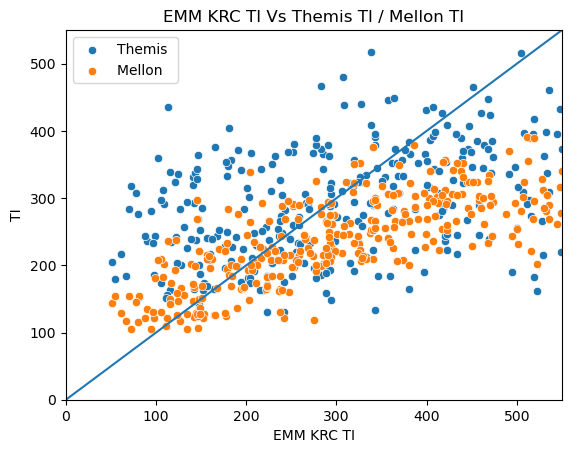

In [29]:
# Plot TIs for THemis Mellon and EMM

plot_columns = ['themis_ti', 'mellon_ti', 'emm_ti']
sns.scatterplot(data = df_compare, x='emm_ti', y = 'themis_ti', label='Themis ')
sns.scatterplot(data = df_compare, x='emm_ti', y = 'mellon_ti', label='Mellon ')
plt.xlim([0,550])
plt.ylim([0,550])
plt.plot((0,550),(0,550))

#sns.scatterplot(data = df_compare, x='emm_ti', y = 'mellon_error', label= 'Mellon Error')
plt.legend()
plt.xlabel('EMM KRC TI')
plt.ylabel('TI')
plt.title('EMM KRC TI Vs Themis TI / Mellon TI')

In [30]:
# Correlation

df_compare[['emm_ti', 'themis_ti', 'mellon_ti']].corr()

,emm_ti,themis_ti,mellon_ti
emm_ti,1.000000,-0.057155,0.727687
themis_ti,-0.057155,1.000000,-0.091140
mellon_ti,0.727687,-0.091140,1.000000


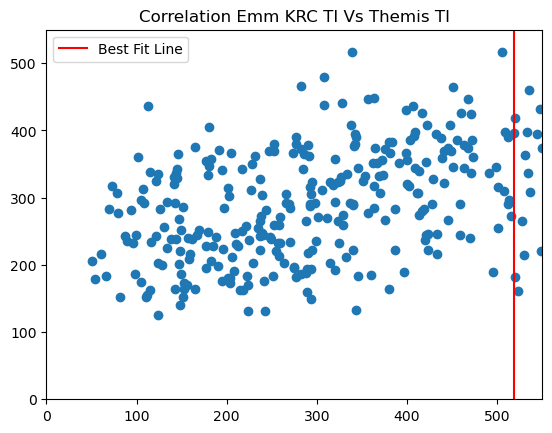

In [31]:
x = df_compare['emm_ti']
y = df_compare['themis_ti']
# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red', label='Best Fit Line')
plt.xlim([0,550])
plt.ylim([0,550])

plt.title('Correlation Emm KRC TI Vs Themis TI')
plt.legend()


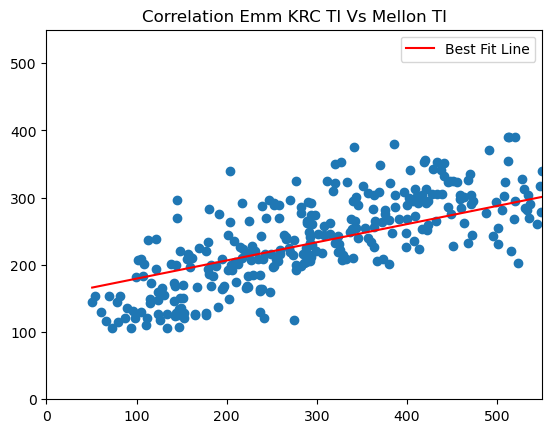

In [32]:
x = df_compare['emm_ti']
y = df_compare['mellon_ti']
# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red', label='Best Fit Line')
plt.xlim([0,550])
plt.ylim([0,550])

plt.title('Correlation Emm KRC TI Vs Mellon TI')
plt.legend()


Text(0.5, 1.0, 'Correlation Heat Map')

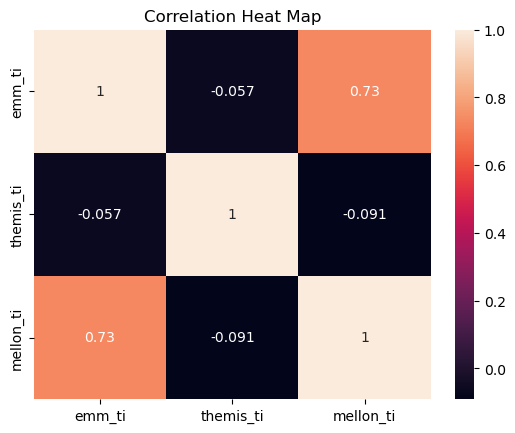

In [33]:
# View heatmap

sns.heatmap(df_compare[['emm_ti', 'themis_ti', 'mellon_ti']].corr(), annot=True)
plt.title('Correlation Heat Map')

(0.0, 500.0)

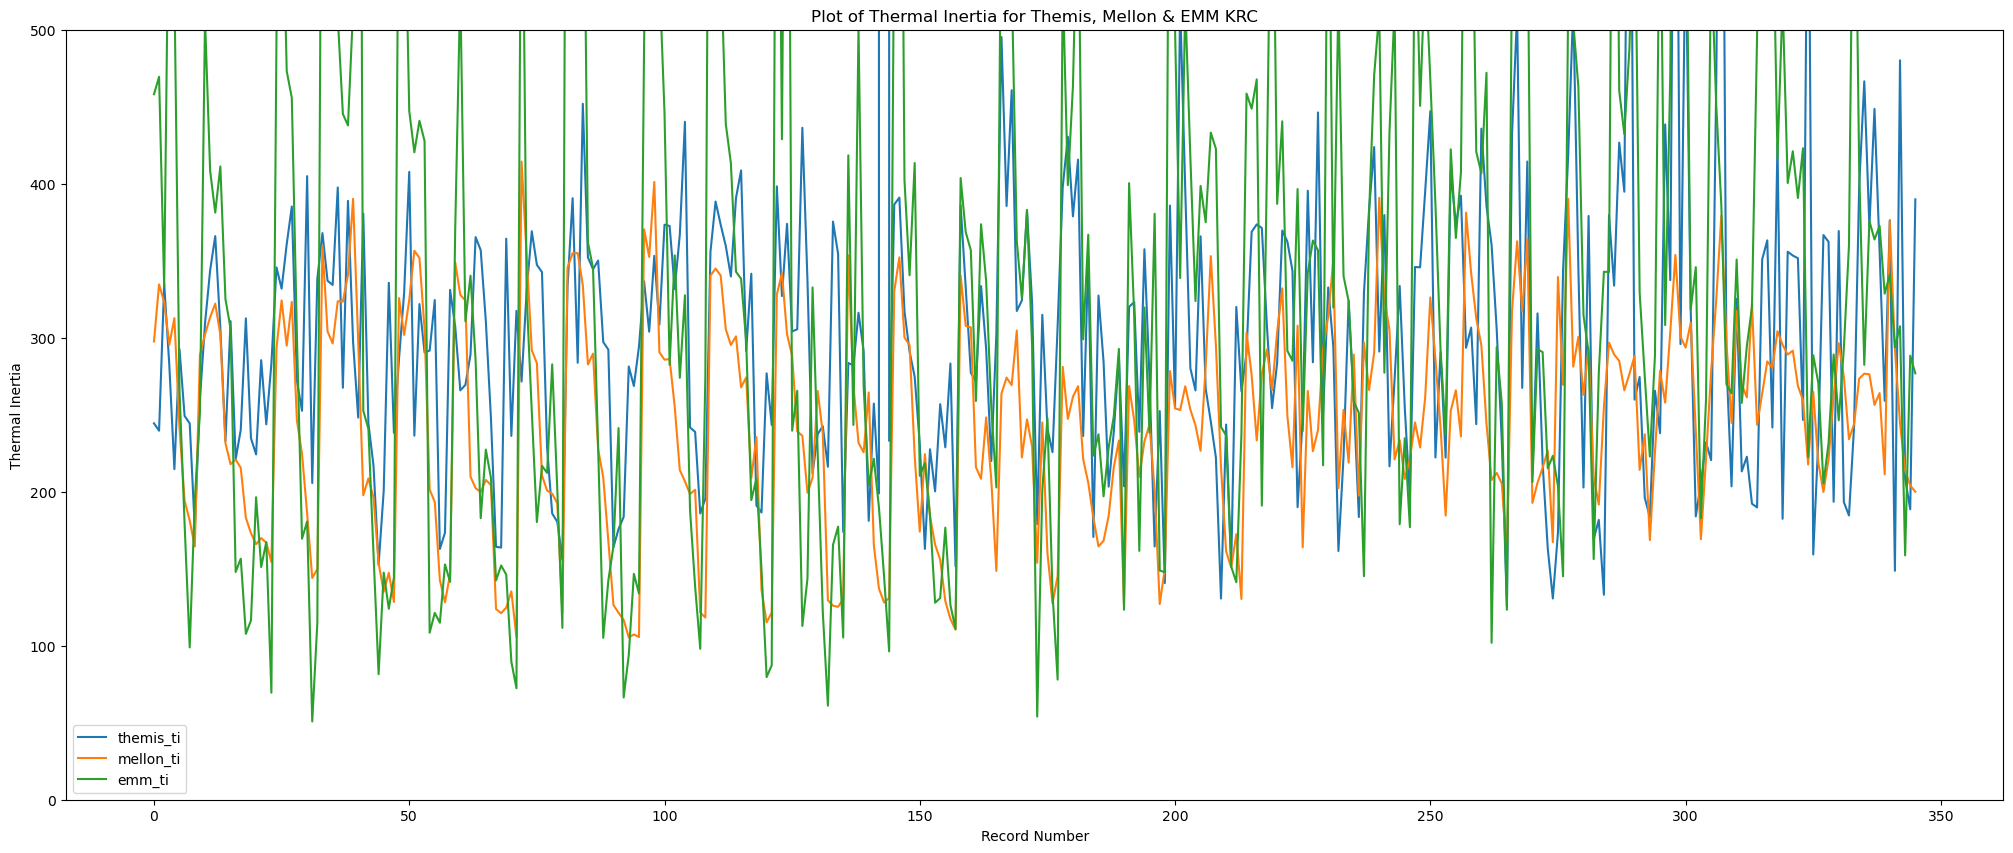

In [34]:
# Visually check variation

plt.figure(figsize=(25, 10)) 
df_compare['themis_ti'].plot()
df_compare['mellon_ti'].plot()
df_compare['emm_ti'].plot()
#df_compare['themis_pct_diff'].plot(label='themis %diff')
#df_compare['mellon_pct_diff'].plot(label='mellon %diff')
plt.legend()
plt.title('Plot of Thermal Inertia for Themis, Mellon & EMM KRC')
plt.xlabel('Record Number')
plt.ylabel('Thermal Inertia')
plt.ylim([0,500])
#plt.xlim([0,134])

In [35]:
# Check individual and over lat and lon


In [36]:
def create_subplots_byrow(themis_grid, mellon_grid, emm_grid):
    '''Function to create plots by row'''
    total_rows_data = emm_grid.shape[0]
    
    sub_plot_cols = 5
    
    if total_rows_data%sub_plot_cols == 0:
        sub_plot_rows = int(total_rows_data/sub_plot_cols)
    else:
        sub_plot_rows = int(total_rows_data/sub_plot_cols)+1
    
    plt.figure(figsize=(10,10)) 
    
    for row in range(0,total_rows_data):
        #print(row, sub_plot_rows, sub_plot_cols)
        plt.subplot(sub_plot_rows, sub_plot_cols, row+1)
        
        mask1 = np.isfinite(emm_grid[row:row+1]) & np.isfinite(themis_grid[row:row+1]) & np.isfinite(mellon_grid[row:row+1])
        plt.plot(pd.DataFrame(themis_grid[row:row+1][mask1].flatten())[0],label='t')
        plt.plot(pd.DataFrame(mellon_grid[row:row+1][mask1].flatten())[0],label='m')
        plt.plot(pd.DataFrame(emm_grid[row:row+1][mask1].flatten())[0],label='e')
        #plt.legend()
        #pd.DataFrame(mellon_grid[row:row+1][mask1].flatten())[0].plot(label='mellon')
        #pd.DataFrame(emm_grid[row:row+1][mask1].flatten())[0].plot(label='emm')

        #plt.hist(df[col])
        plt.title('Lat Row - ' + str(row))
        #plt.show
    plt.tight_layout()
    plt.legend(['themis', 'mellon', 'emm'], loc='best')
    plt.show()

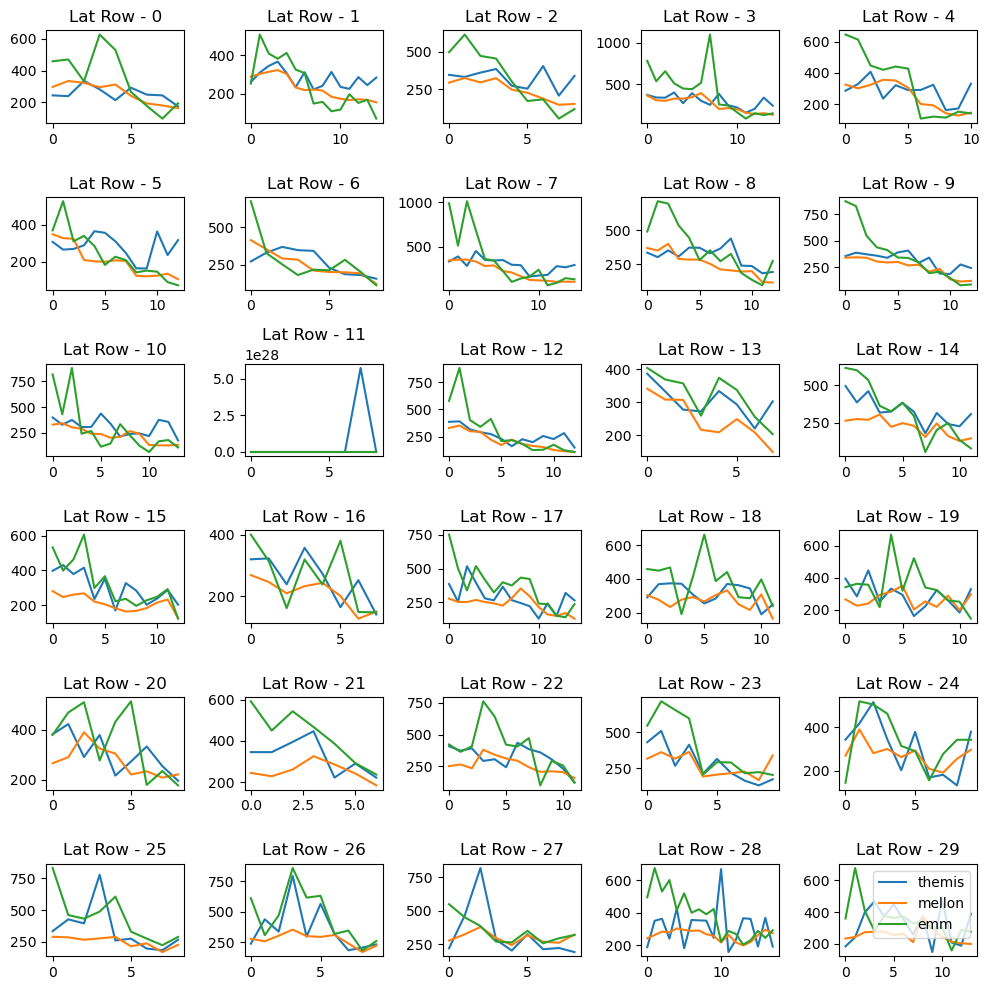

In [37]:
create_subplots_byrow(themis_grid, mellon_grid, emm_grid)

In [38]:
# Calculate Mean Standard Error

from sklearn.metrics import mean_absolute_error as mae 
# calculate MAE 
error_themis = mae(df_compare['emm_ti'], df_compare['themis_ti'])
error_mellon = mae(df_compare['emm_ti'], df_compare['mellon_ti'])
  
# display 
print("Mean absolute error Themis: " + str(error_themis)) 
print("Mean absolute error Mellon: " + str(error_mellon)) 

Mean absolute error Themis: 1.657603182050711e+26
Mean absolute error Mellon: 119.95767327168697


In [39]:
from sklearn.metrics import r2_score
score_themis = r2_score(df_compare['emm_ti'], df_compare['themis_ti'])
score_mellon = r2_score(df_compare['emm_ti'], df_compare['mellon_ti'])
print("The accuracy of our model is {}%".format(round(score_themis, 2) *100))
print("The accuracy of our model is {}%".format(round(score_mellon, 2) *100))

The accuracy of our model is -2.743107129132215e+52%
The accuracy of our model is 13.0%


In [40]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse_themis = np.sqrt(mean_squared_error(df_compare['emm_ti'], df_compare['themis_ti']))
rmse_mellon = np.sqrt(mean_squared_error(df_compare['emm_ti'], df_compare['mellon_ti']))

 
print("Root Mean Squared Error (RMSE):", rmse_themis)
print("Root Mean Squared Error (RMSE):", rmse_mellon)


Root Mean Squared Error (RMSE): 3.083320150363965e+27
Root Mean Squared Error (RMSE): 173.89755298942845


In [42]:
import statsmodels.api as sm
Y = df_compare['emm_ti']
X = df_compare['mellon_ti']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
#results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 emm_ti   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     387.2
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           2.79e-58
Time:                        14:33:20   Log-Likelihood:                -2168.9
No. Observations:                 346   AIC:                             4342.
Df Residuals:                     344   BIC:                             4350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -137.1163     25.351     -5.409      0.000    -186.978     -87.254
mellon_ti      1.9574      0.099     19.677      0.000       1.762       2.153
==============================================================================
Omnibus:                       74.429   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.513
Skew:                           1.054   Prob(JB):                     4.69e-39
Kurtosis:                       5.793   Cond. No.                         938.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          -137.1163     25.351     -5.409      0.000    -186.978     -87.254


In [44]:
# Perform ols on 


Y = df_compare['emm_ti']
X = df_compare['themis_ti']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
#results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 emm_ti   R-squared:                      -3.392
Model:                            OLS   Adj. R-squared:                 -3.392
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Mar 2025   Prob (F-statistic):                nan
Time:                        14:33:24   Log-Likelihood:                -2555.4
No. Observations:                 346   AIC:                             5113.
Df Residuals:                     345   BIC:                             5117.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.418e-56   1.19e-55      0.372      0.710   -1.89e-55    2.78e-55
themis_ti   2.534e-27   6.81e-27      0.372      0.710   -1.09e-26    1.59e-26
==============================================================================
Omnibus:                       51.856   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.048
Skew:                           0.978   Prob(JB):                     8.33e-17
Kurtosis:                       4.146   Cond. No.                     3.09e+27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+27. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          4.418e-56   1.19e-55      0.372      0.710   -1.89e-55    2.78e-55
